## Question 1: Happiness

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
import time
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [257]:
# read data
data2015original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2015.csv")
data2016original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2016.csv")
data2017original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2017.csv")
print (data2015original.shape)
print (data2016original.shape)
print (data2017original.shape)

(158, 12)
(157, 13)
(155, 12)


In [258]:
data2015 = data2015original
data2016 = data2016original
data2017 = data2017original

# preprocess data

#drop country name because it's not a useful feature
#drop happiness features because it's the output
data2015 = data2015.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error'], axis=1)
data2016 = data2016.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
data2017 = data2017.drop(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low'], axis=1)
#convert region to categorical indicators using get_dummies
data2015 = pd.get_dummies(data2015, columns=['Region'])
data2016 = pd.get_dummies(data2016, columns=['Region'])
print (data2015.shape)
print (data2016.shape)
print (data2017.shape)

(158, 17)
(157, 17)
(155, 7)


## Preliminary Visualization

(158, 17)


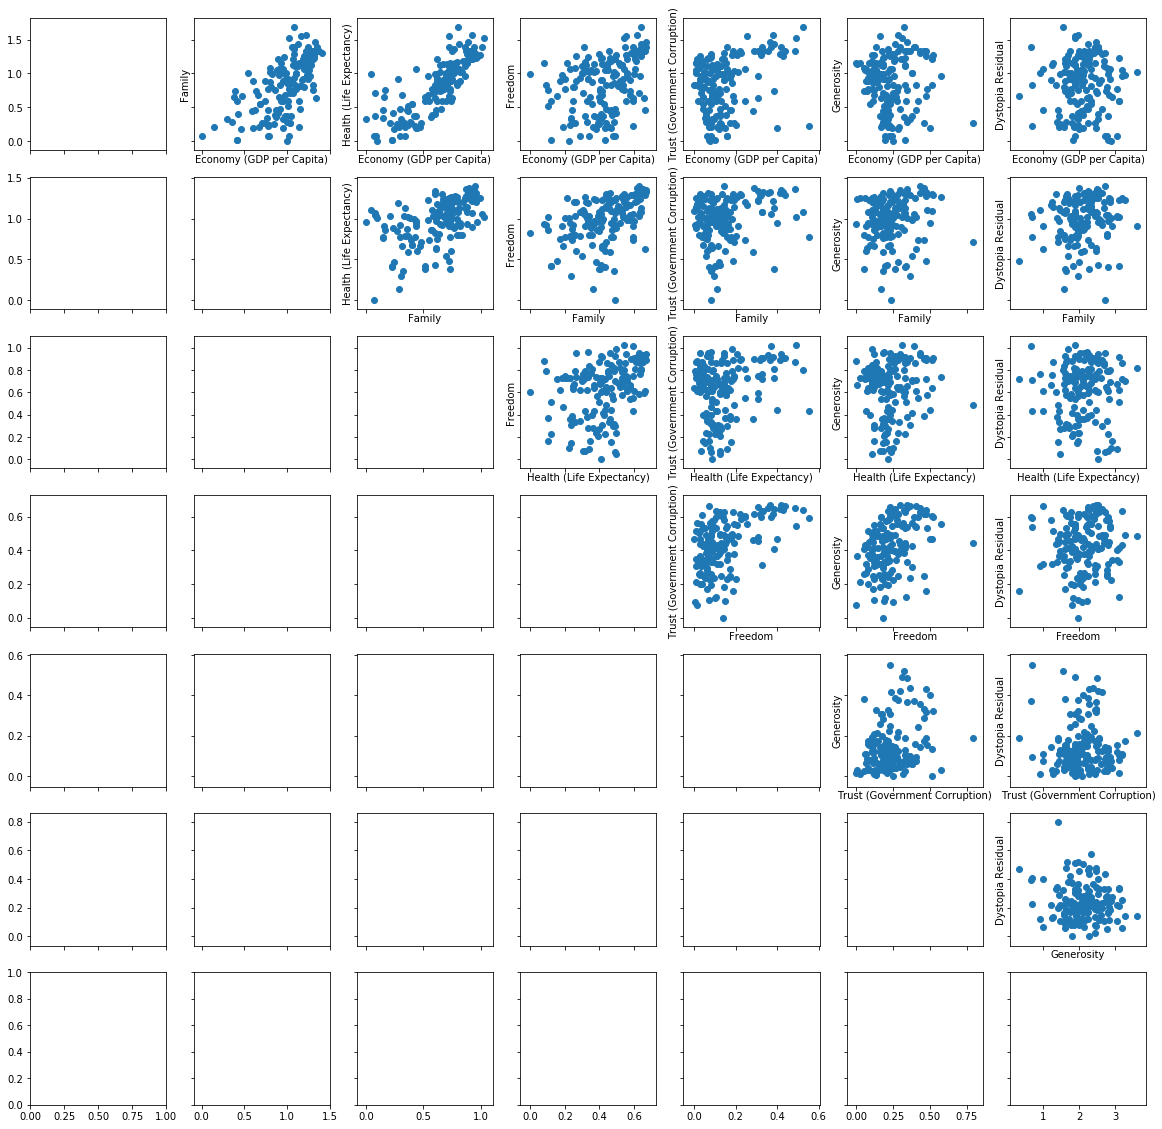

In [259]:
#Premilinary visualization on 2015 data
titles = data2015.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2015[titles[n]], data2015[titles[m]])
        ax[m,n].set(xlabel=titles[m], ylabel=titles[n])
#        cell.set_ylabel(titles[j])
#        #ax[m,n].xlabel(titles[n])
#        #ax[m,n].ylabel(titles[m])
#for i, row in enumerate(ax):
#    for j, cell in enumerate(row):
#        cell.set_xlabel(titles[i])
#        cell.set_ylabel(titles[j])
        
print (data2015.shape)
plt.show()

We can see that there is correlation between economy and family size, and economy and life expectancy. Other correlations appear to be less strong.

(157, 17)


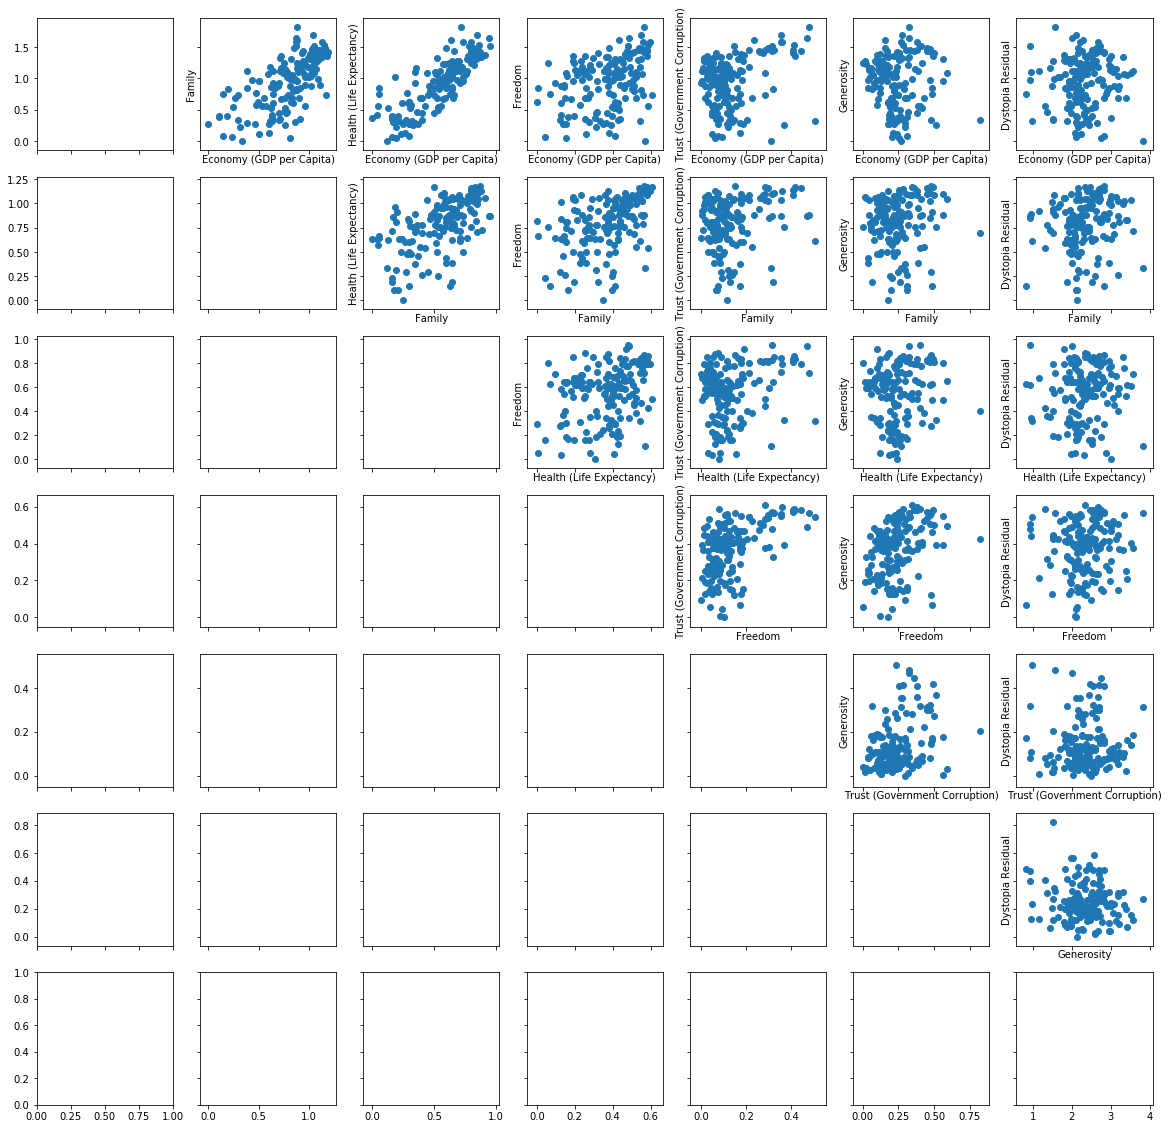

In [260]:
#visualization on 2016data
titles = data2016.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2016[titles[n]], data2016[titles[m]])
        ax[m,n].set(xlabel=titles[m], ylabel=titles[n])
#        cell.set_ylabel(titles[j])
#        #ax[m,n].xlabel(titles[n])
#        #ax[m,n].ylabel(titles[m])
#for i, row in enumerate(ax):
#    for j, cell in enumerate(row):
#        cell.set_xlabel(titles[i])
#        cell.set_ylabel(titles[j])
        
print (data2016.shape)
plt.show()

(155, 7)


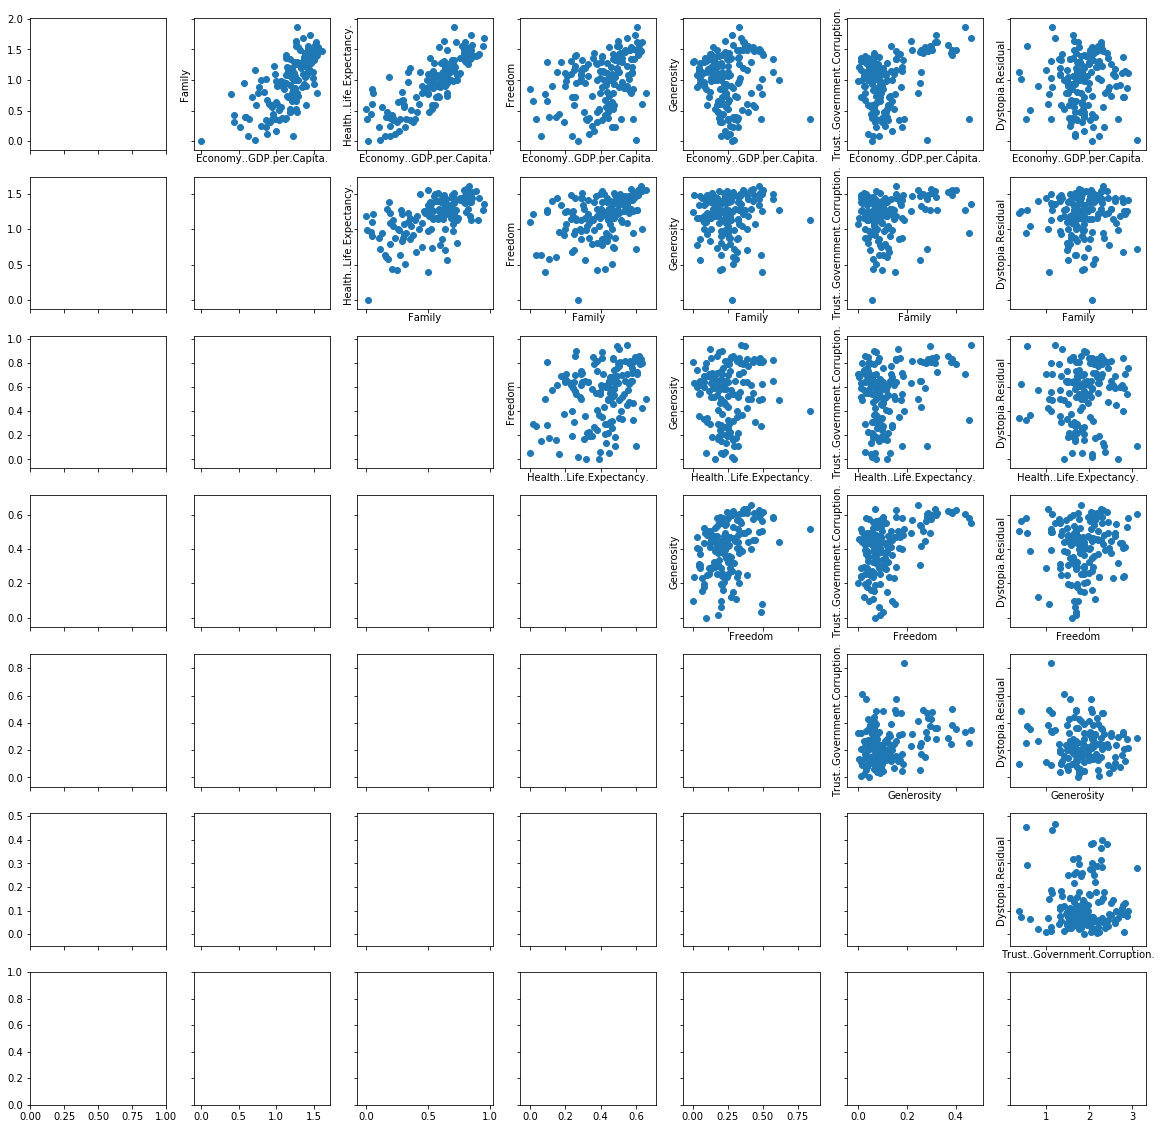

In [261]:
#Premilinary visualization on 2017 data
titles = data2017.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2017[titles[n]], data2017[titles[m]])
        ax[m,n].set(xlabel=titles[m], ylabel=titles[n])
#        cell.set_ylabel(titles[j])
#        #ax[m,n].xlabel(titles[n])
#        #ax[m,n].ylabel(titles[m])
#for i, row in enumerate(ax):
#    for j, cell in enumerate(row):
#        cell.set_xlabel(titles[i])
#        cell.set_ylabel(titles[j])
        
print (data2017.shape)
plt.show()

## PCA Dimension Reduction

The number of principle components with the highest ratio of variance to components is 6
Using 6 components will preserve 88.52% of the data


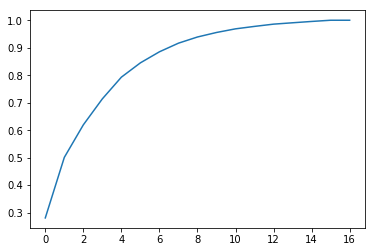

(158, 6)


In [262]:
#PCA Dimension on 2015 data
pca = PCA().fit(data2015)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 2
for n in range(3,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data2015)
data2015 = pca.transform(data2015)
print (data2015.shape)

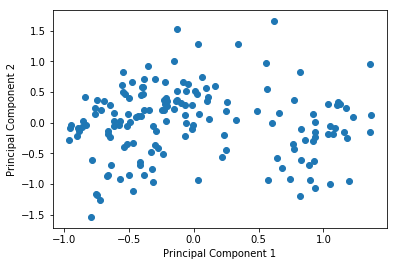

In [263]:
plt.scatter([n[0] for n in data2015],[n[1] for n in data2015])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The number of principle components with the highest ratio of variance to components is 6
Using 6 components will preserve 88.49000000000001% of the data


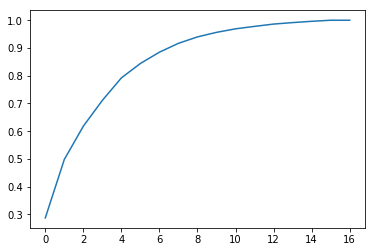

(157, 6)


In [264]:
#pca reduction on data2016
pca = PCA().fit(data2016)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 2
for n in range(3,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data2016)
data2016 = pca.transform(data2016)
print (data2016.shape)

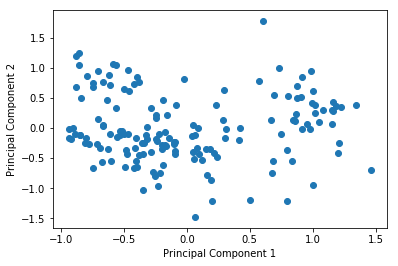

In [265]:
plt.scatter([n[0] for n in data2016],[n[1] for n in data2016])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The number of principle components with the highest ratio of variance to components is 2
Using 2 components will preserve 90.84% of the data


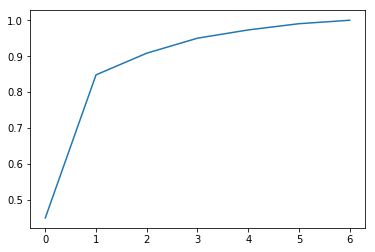

(155, 2)


In [266]:
#PCA Dimension on 2017 data
pca = PCA().fit(data2017)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 2
for n in range(3,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data2017)
data2017 = pca.transform(data2017)
print (data2017.shape)

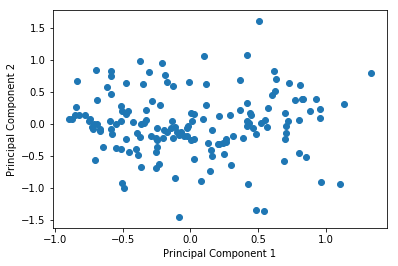

In [267]:
plt.scatter([n[0] for n in data2017],[n[1] for n in data2017])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## KMeans

In [268]:

print (data2015.shape)
print (data2016.shape)
print (data2017.shape)
print (data2015original.shape)
print (data2016original.shape)
print (data2017original.shape)

(158, 6)
(157, 6)
(155, 2)
(158, 12)
(157, 13)
(155, 12)


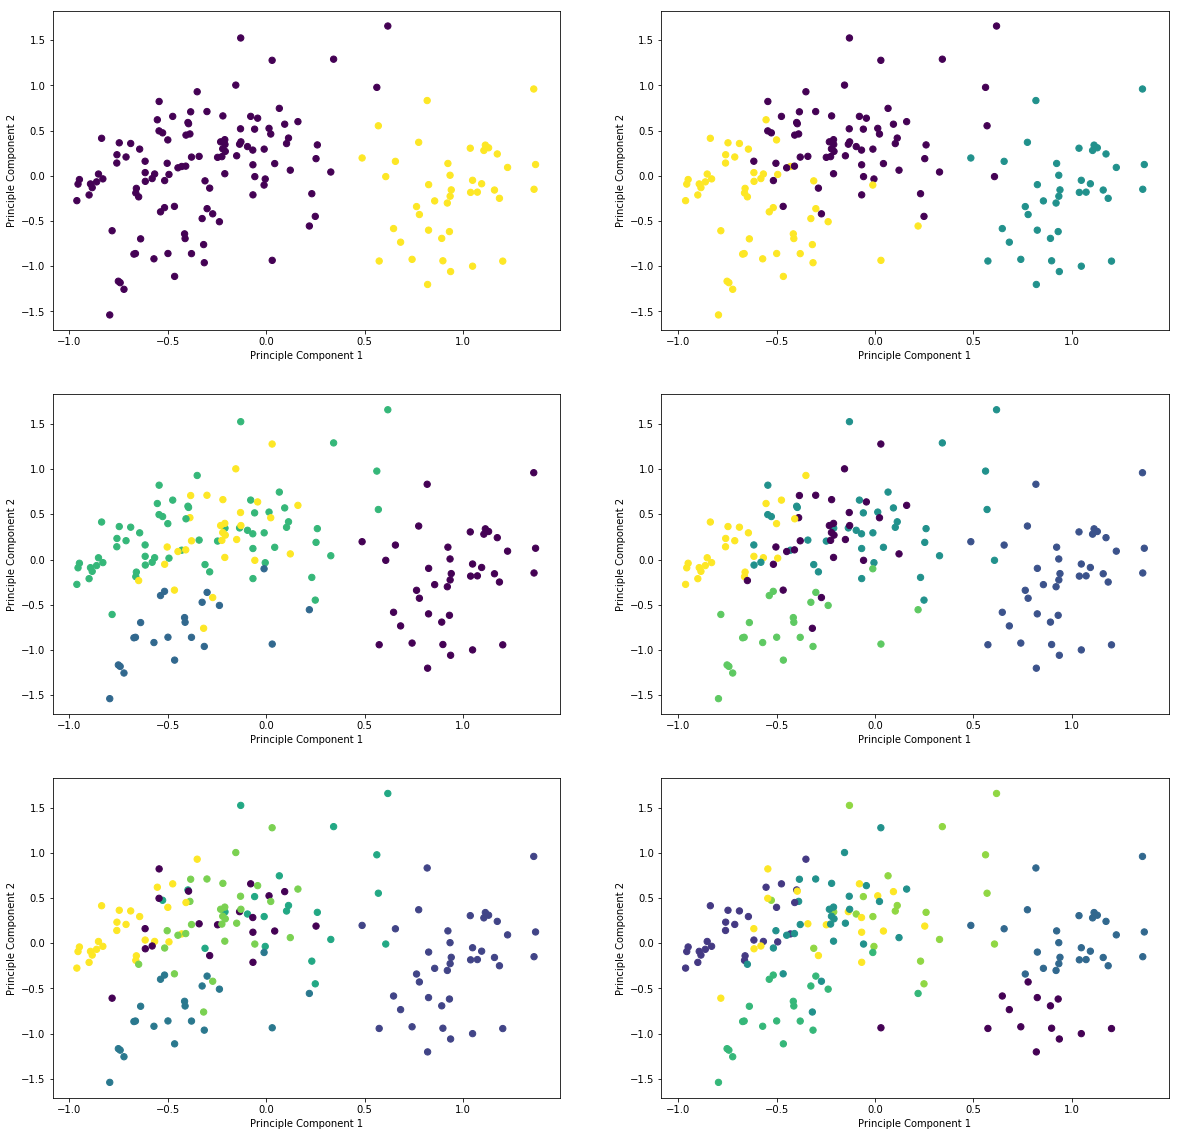

In [269]:
#Kmeans on 2015 data
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2015)
    labels = kmeans.predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

In [285]:
kmeans = KMeans(n_clusters=len(data2015), random_state=int(time.time()))
kmeans.fit(data2015)
labels = kmeans.predict(data2015)
data2015original['kmeans'] = labels

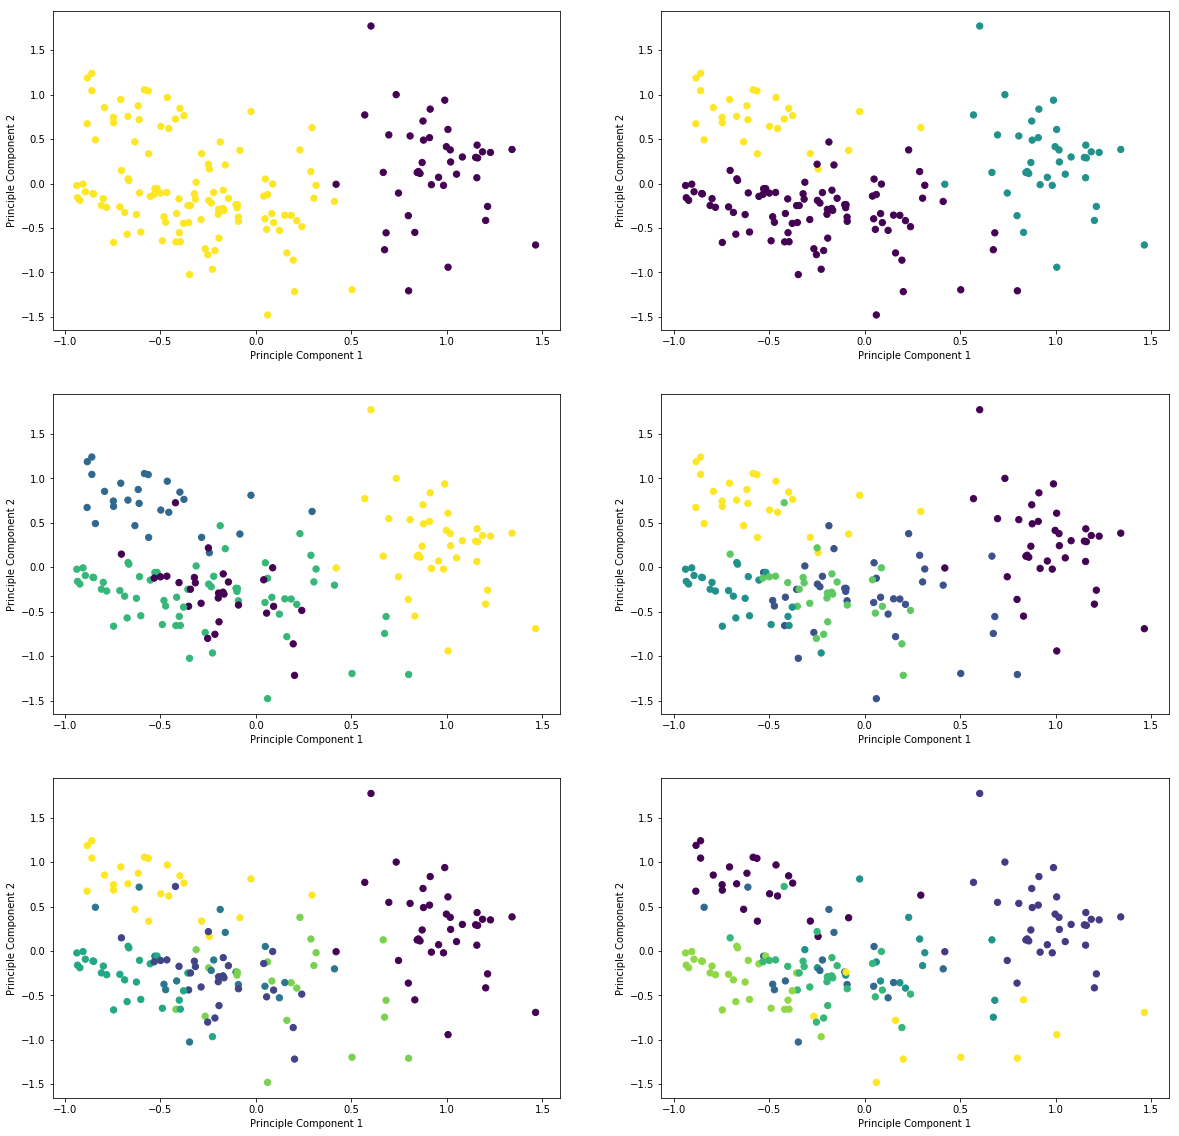

In [271]:
#Kmeans on 2016 data
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2016)
    labels = kmeans.predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

In [272]:
kmeans = KMeans(n_clusters=len(data2016), random_state=int(time.time()))
kmeans.fit(data2016)
labels = kmeans.predict(data2016)
data2016original['kmeans'] = labels

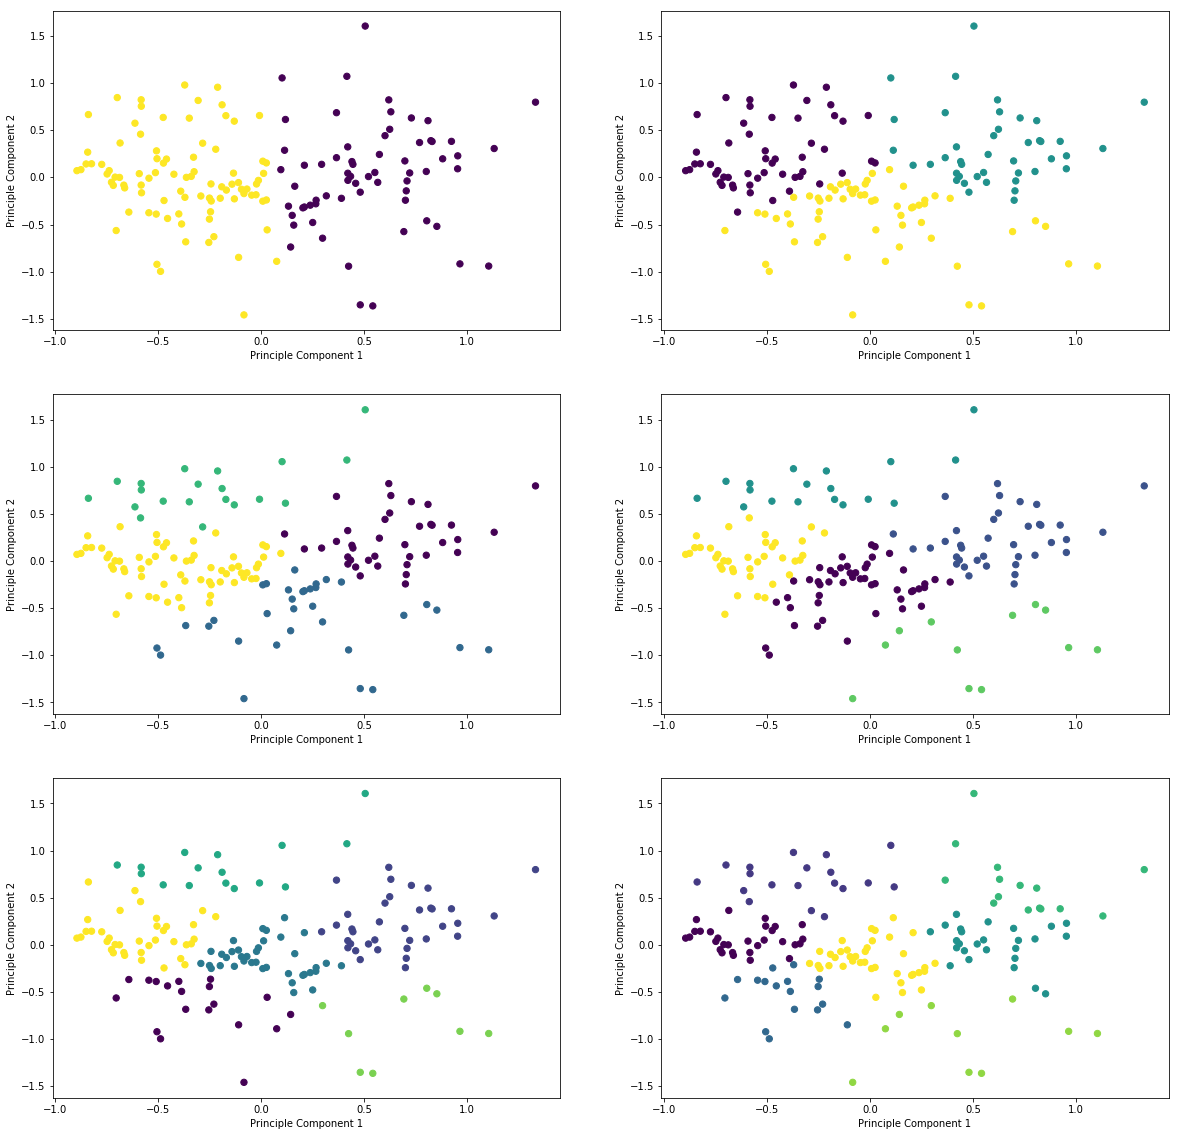

In [273]:
#Kmeans on 2017 data
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2017)
    labels = kmeans.predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

In [277]:
kmeans = KMeans(n_clusters=len(data2017), random_state=int(time.time()))
kmeans.fit(data2017)
labels = kmeans.predict(data2017)
data2017original['kmeans'] = labels

## GMM

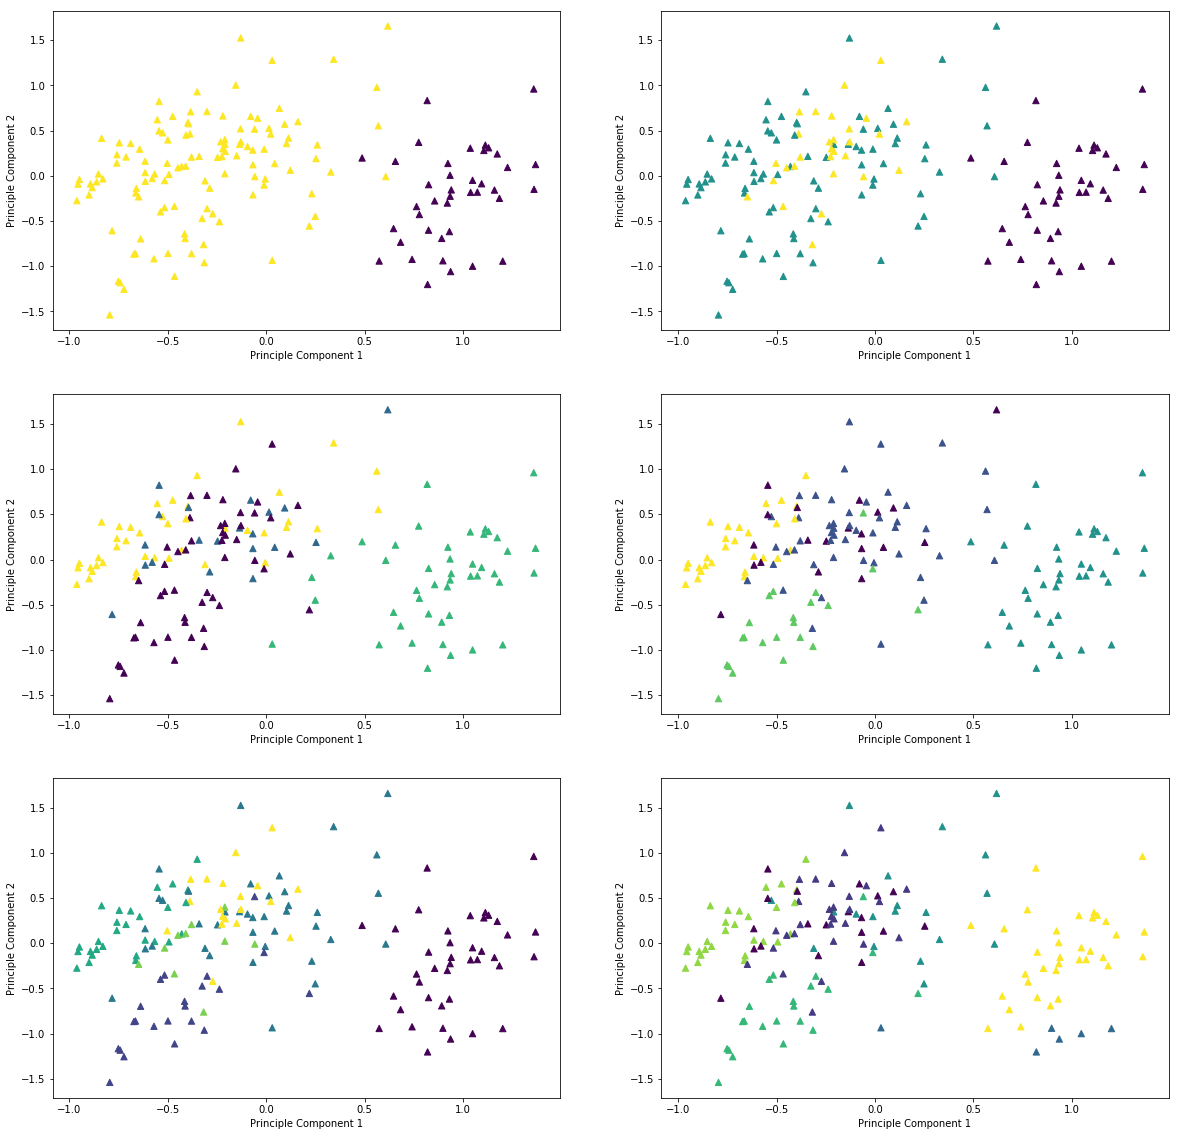

In [275]:
#GMM for 2015 data
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2015)
    gmm.fit(data2015)
    labels = gmm.predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

In [278]:
gmm = GaussianMixture(n_components=len(data2015), covariance_type='full').fit(data2015)
gmm.fit(data2015)
labels = gmm.predict(data2015)
data2015original['gmm'] = labels

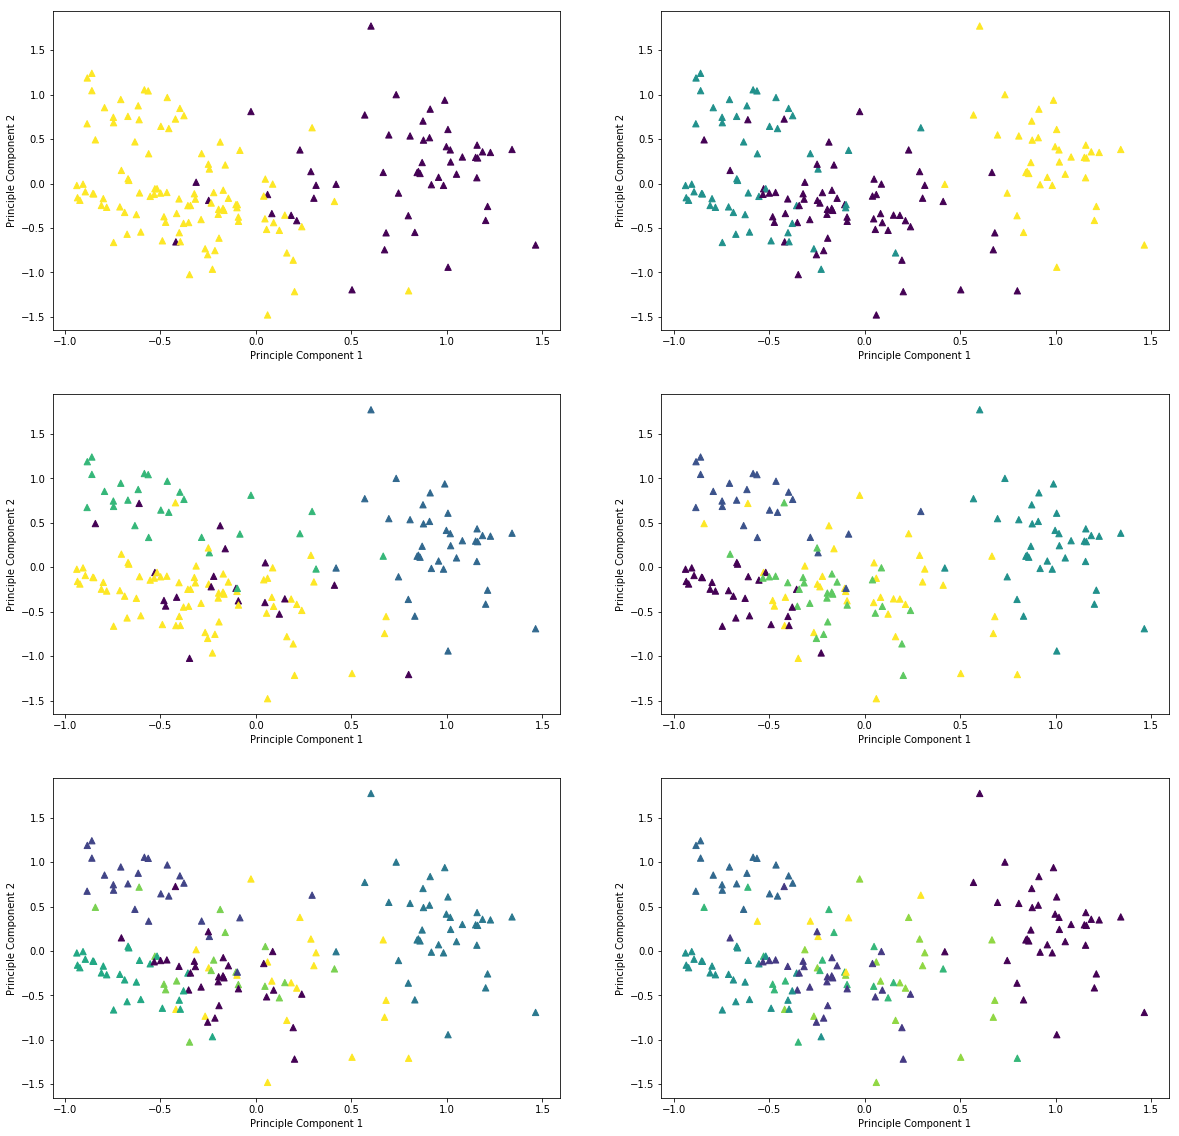

In [287]:
#GMM on 2016 data
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2016)
    gmm.fit(data2016)
    labels = gmm.predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

In [288]:
gmm = GaussianMixture(n_components=len(data2016), covariance_type='full').fit(data2016)
gmm.fit(data2016)
labels = gmm.predict(data2016)
data2016original['gmm'] = labels

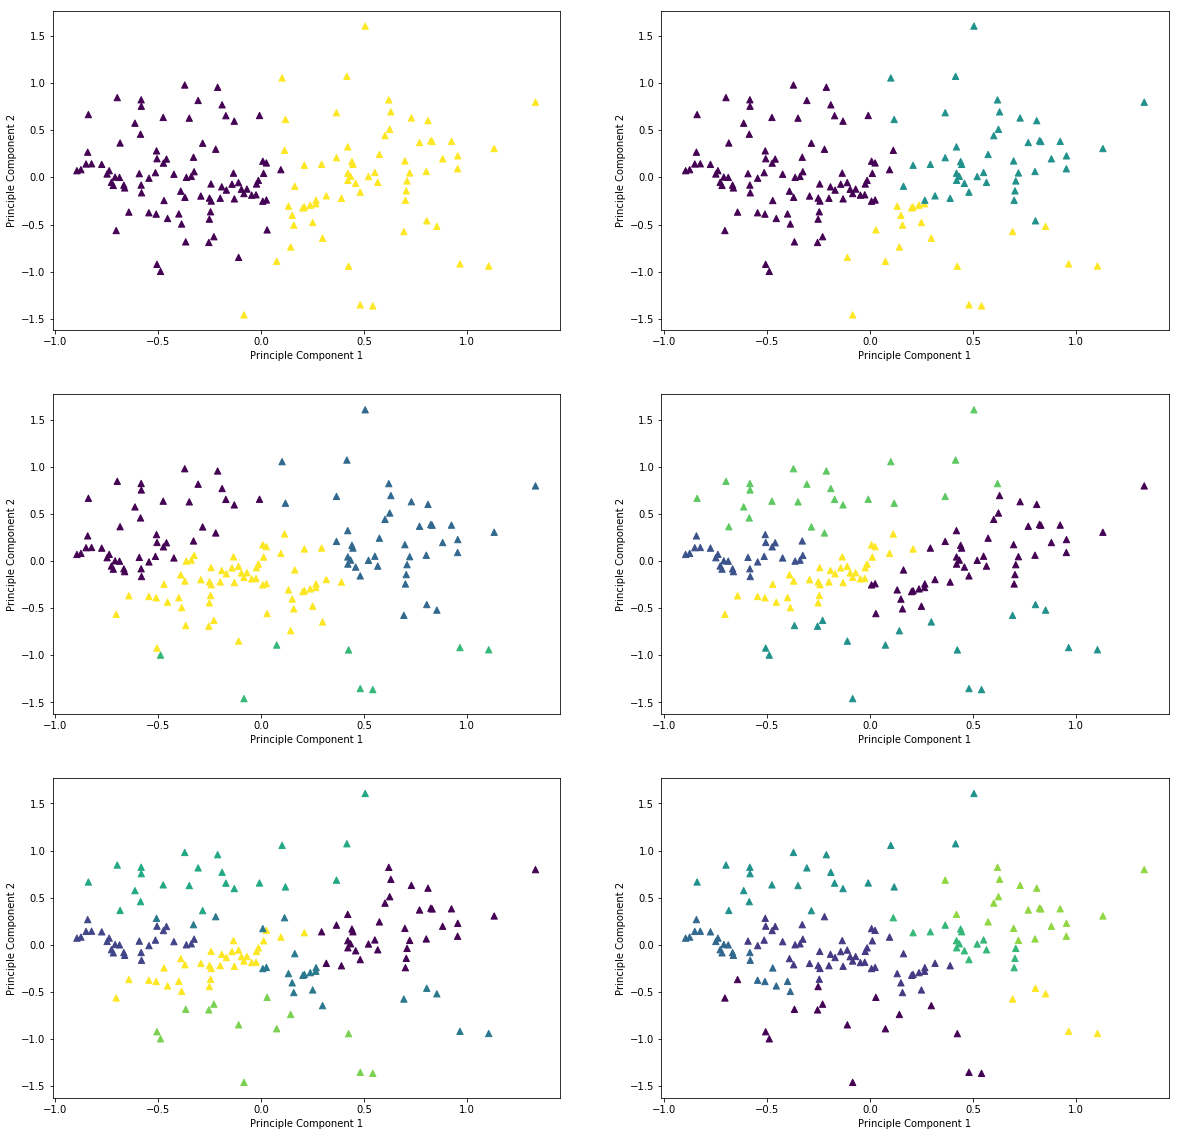

In [289]:
#GMM on 2017 data
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2017)
    gmm.fit(data2017)
    labels = gmm.predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

In [290]:
gmm = GaussianMixture(n_components=len(data2017), covariance_type='full').fit(data2017)
gmm.fit(data2017)
labels = gmm.predict(data2017)
data2017original['gmm'] = labels

## AgglomerativeClusutering

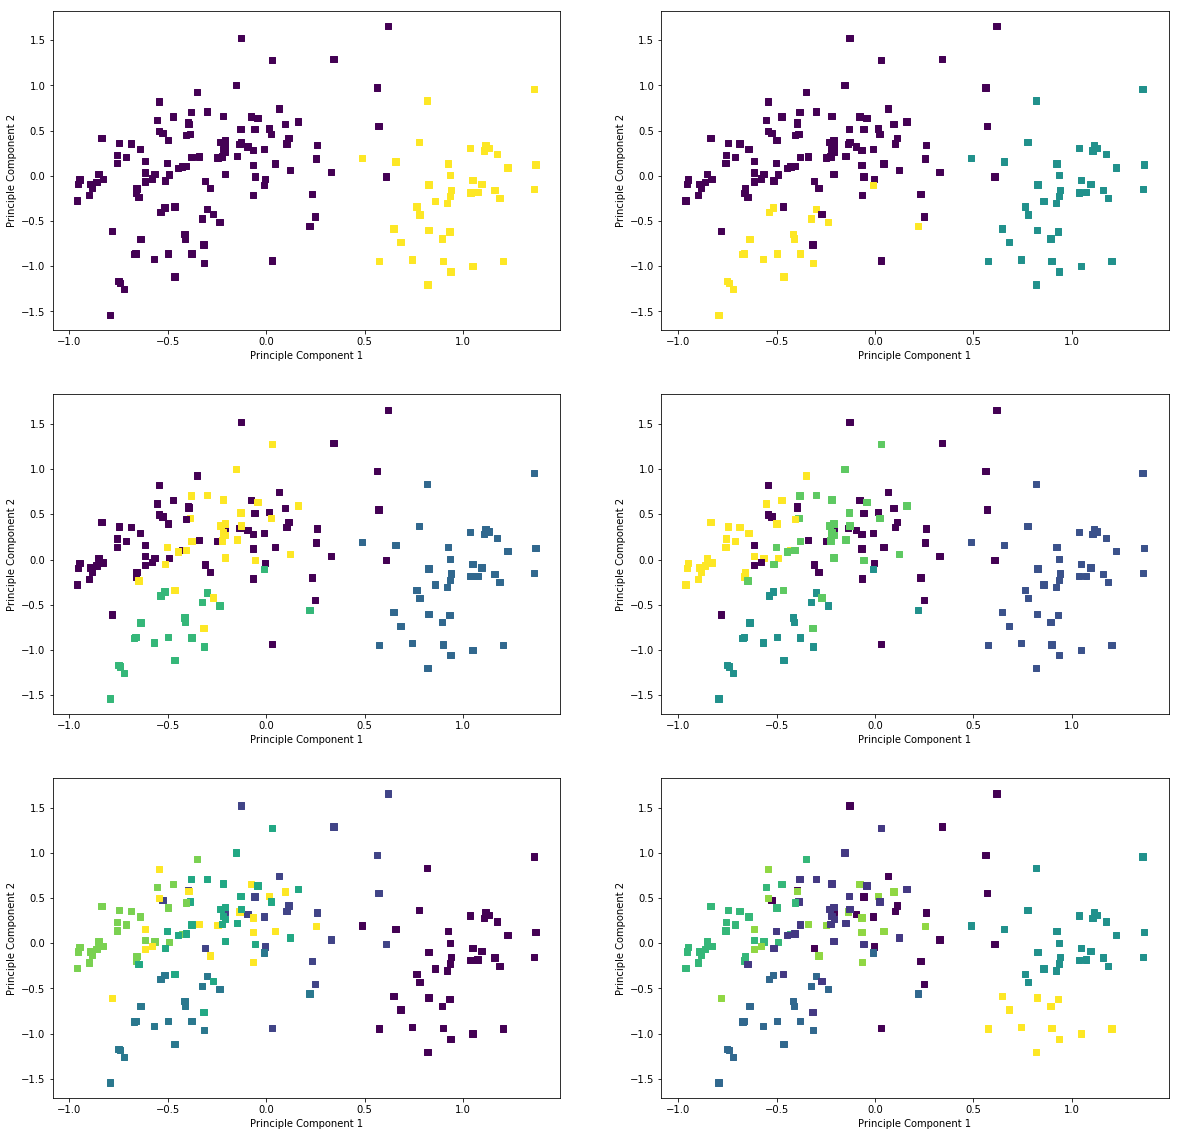

In [279]:
#Agglomerativeclustering on 2015 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

In [291]:
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=len(data2015), pooling_func='deprecated')
labels = agglo.fit_predict(data2015)
data2015original['agglo'] = labels

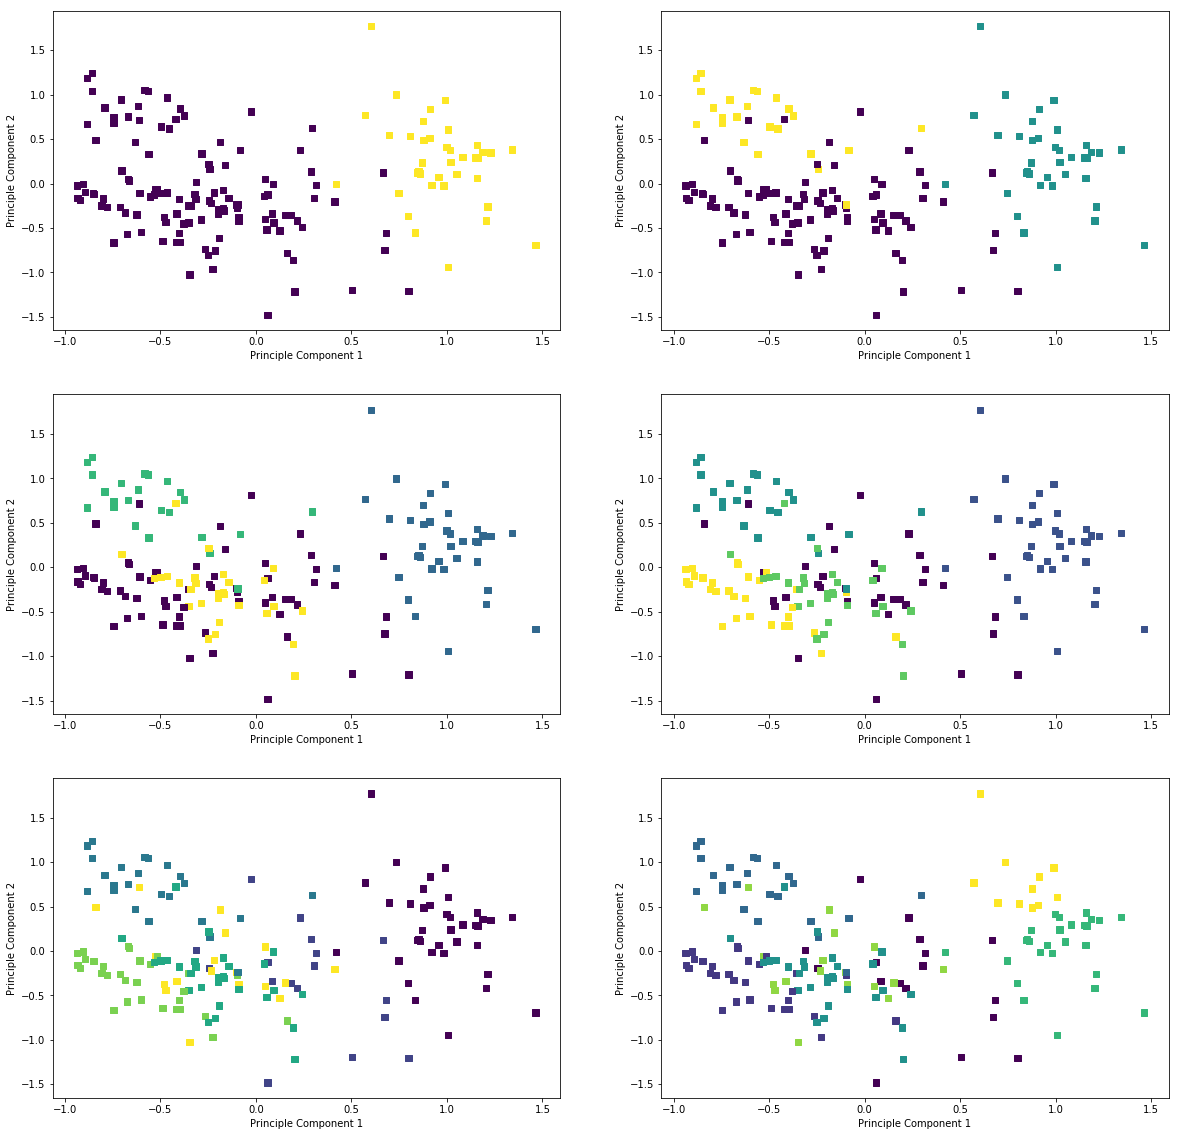

In [292]:
#Agglomerativeclustering on 2016 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

In [295]:
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=len(data2016), pooling_func='deprecated')
labels = agglo.fit_predict(data2016)
data2016original['agglo'] = labels

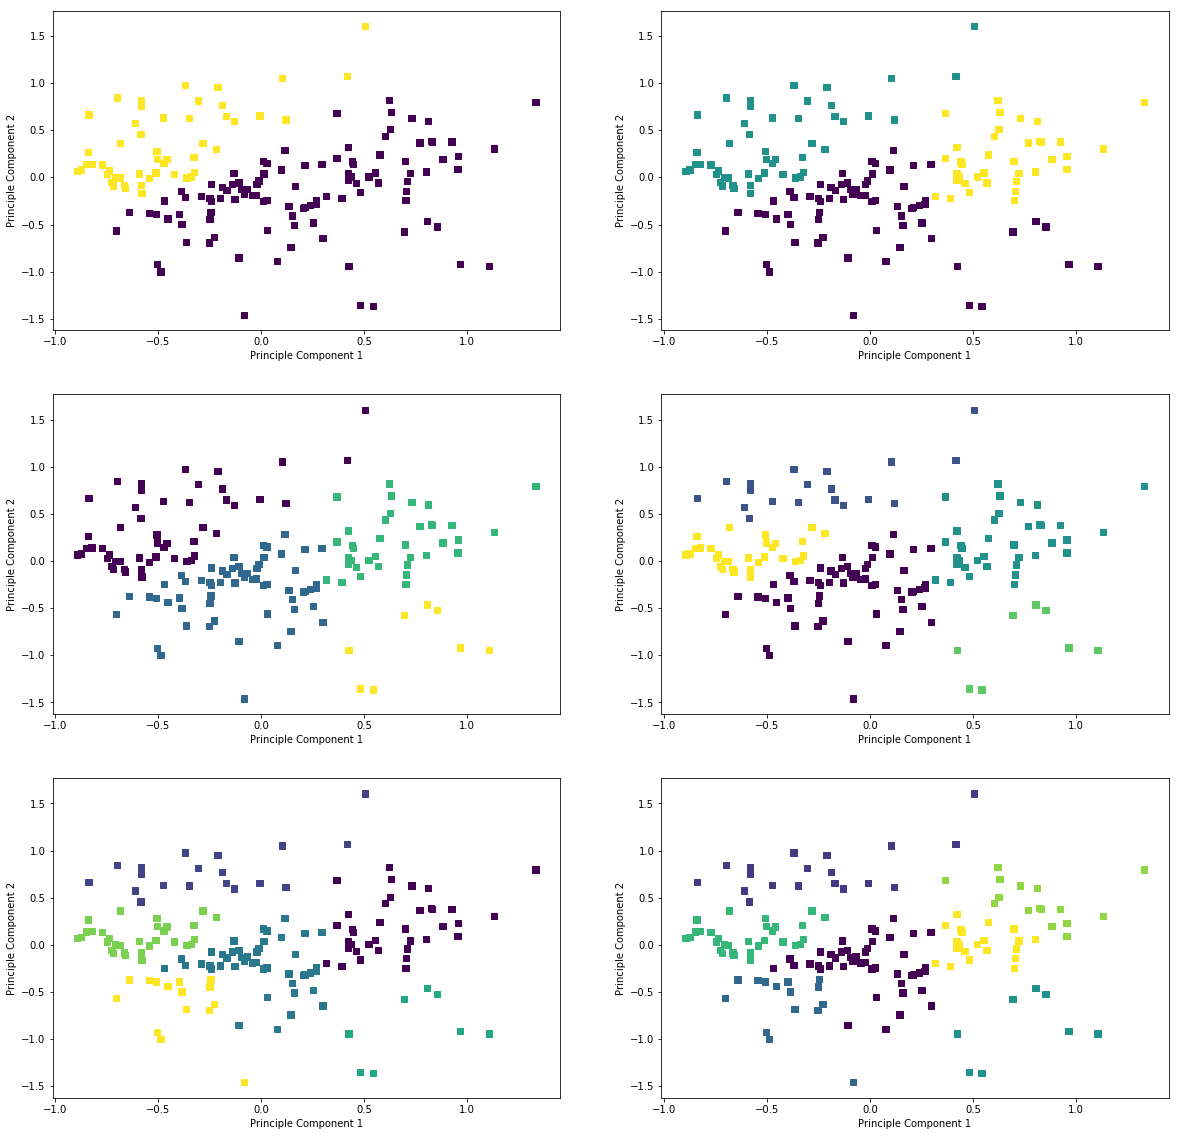

In [294]:
#Agglomerativeclustering on 2017 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

In [296]:
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=len(data2017), pooling_func='deprecated')
labels = agglo.fit_predict(data2017)
data2017original['agglo'] = labels

## Spectral Clustering

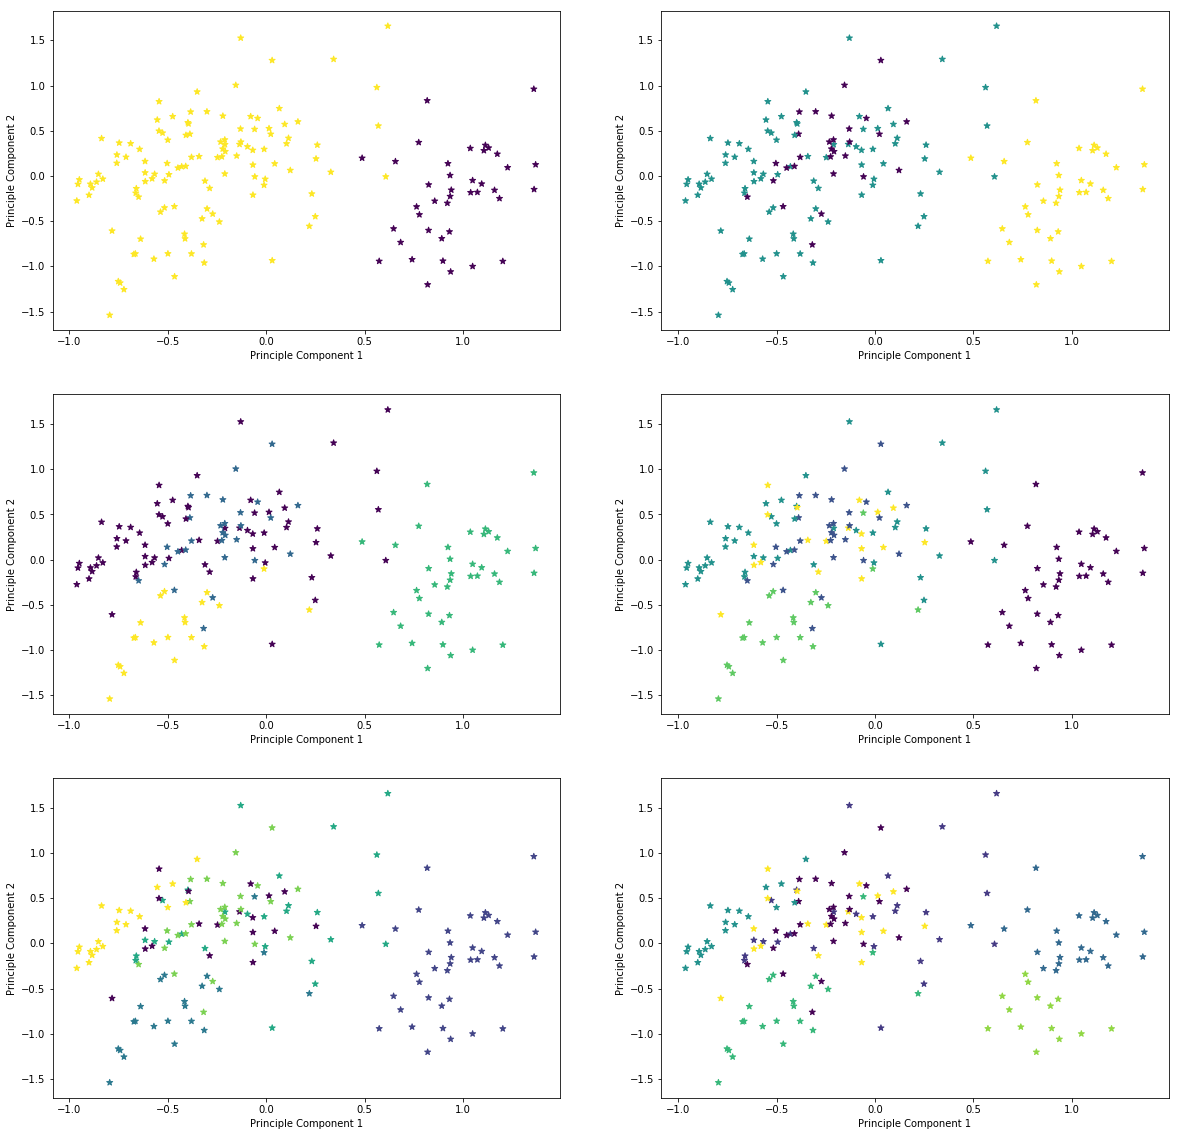

In [281]:
#SpectralClustering on 2015 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

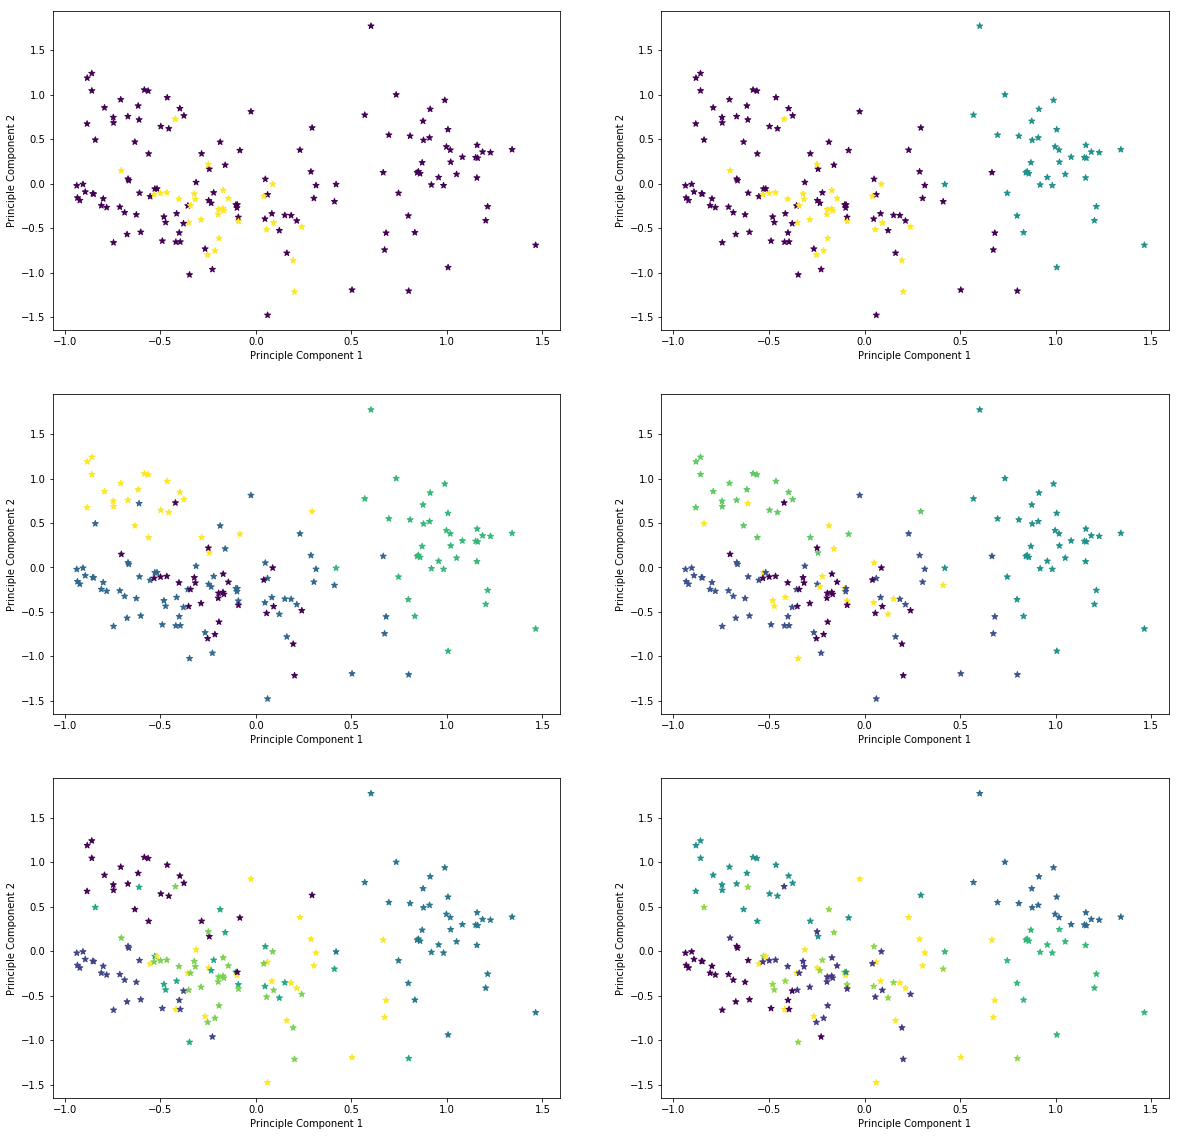

In [297]:
#SpectralClustering on 2016 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

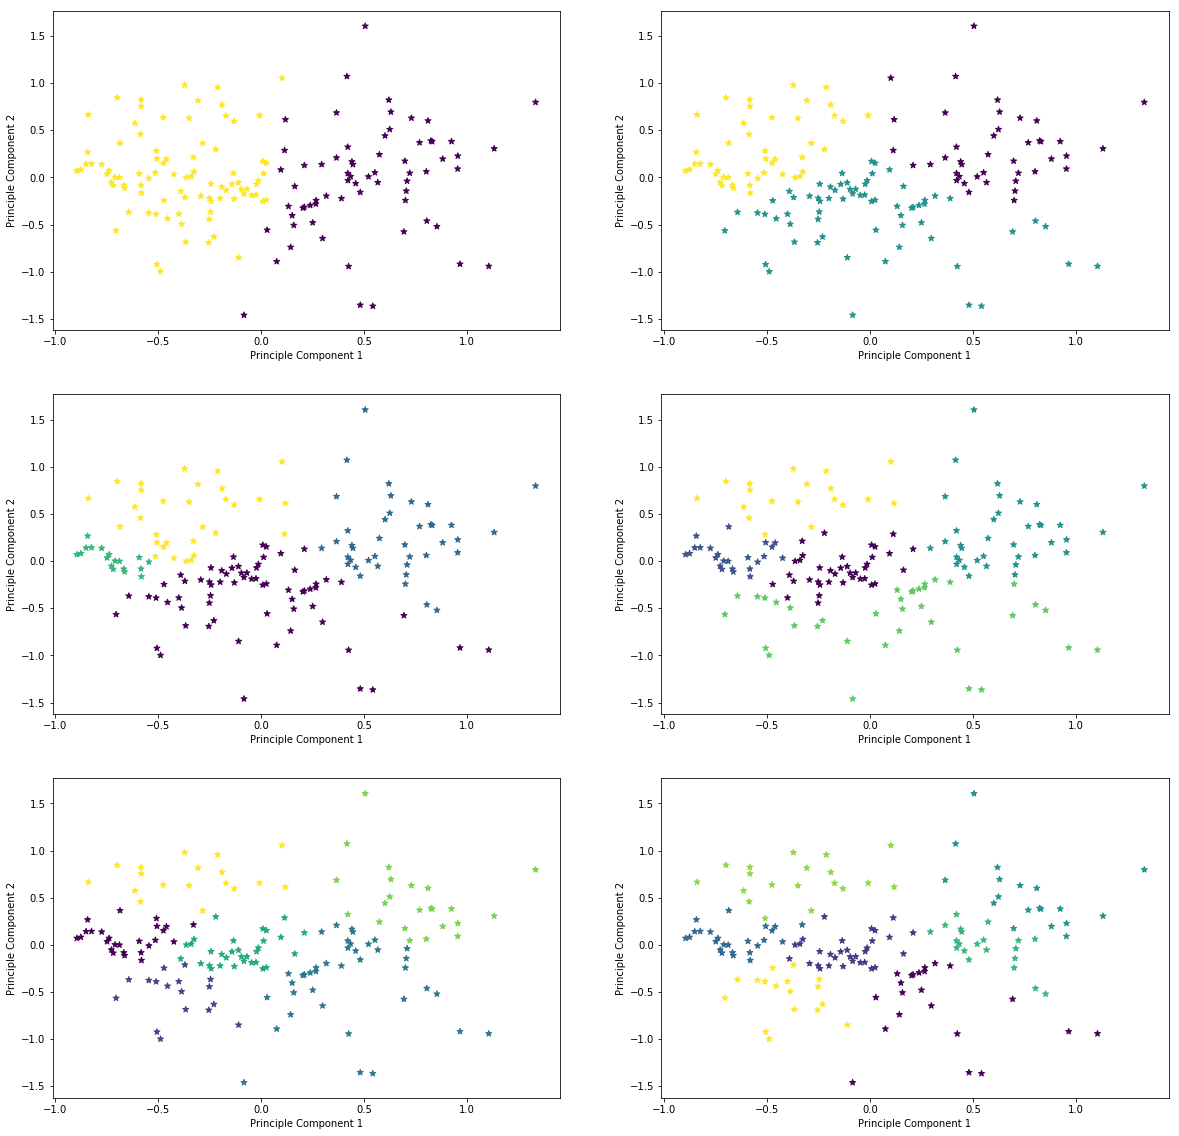

In [298]:
#SpectralClustering on 2017 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

## Agglomerative Seriation

Since we already clustered with numClusters equal to the number of countries, we simply rank the countries by which cluster they are in.

In [282]:
data2015original.nlargest(20,'agglo') #nlargest is happiest

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gmm,agglo
50,Bolivia,Latin America and Caribbean,51,5.890,0.05642,0.68133,0.97841,0.53920,0.57414,0.08800,0.20536,2.82334,127,157
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,9,156
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,155,155
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882,5,154
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,1,153
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142,152,152
47,Ecuador,Latin America and Caribbean,48,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942,76,151
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,150,150
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,149,149
20,United Kingdom,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994,30,148


In [283]:
data2015original.nsmallest(20,'agglo') #nsmallest is saddest

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gmm,agglo
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,66,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,31,1
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,100,2
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,14,3
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,52,4
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,137,5
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541,41,6
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,27,7
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,17,8
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,157,9


In [299]:
data2016original.nlargest(20,'agglo') #nlargest is happiest

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
85,Serbia,Central and Eastern Europe,86,5.177,5.083,5.271,1.03437,0.81329,0.64580,0.15718,0.04339,0.20737,2.27539,0,3,156
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,81,155,155
55,Russia,Central and Eastern Europe,56,5.856,5.789,5.923,1.23228,1.05261,0.58991,0.32682,0.03586,0.02736,2.59115,32,48,154
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,60,61,153
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,152,150,152
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,10,97,151
50,Ecuador,Latin America and Caribbean,51,5.976,5.880,6.072,0.97306,0.85974,0.68613,0.40270,0.18037,0.10074,2.77366,149,151,150
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,54,77,149
80,Azerbaijan,Central and Eastern Europe,81,5.291,5.226,5.356,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350,150,148,148
44,Slovakia,Central and Eastern Europe,45,6.078,5.996,6.160,1.27973,1.08268,0.70367,0.23391,0.02947,0.13837,2.61065,148,142,147


In [300]:
data2016original.nsmallest(20,'agglo') #nsmallest is saddest

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,114,85,0
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,140,20,1
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,17,15,2
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,74,116,3
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319,115,46,4
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,53,50,5
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,34,123,6
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075,95,89,7
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,26,104,8
140,Angola,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,1,145,9


In [301]:
data2017original.nlargest(20,'agglo') #nlargest is happiest

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
93,Vietnam,94,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319,89,125,154
23,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,87,53,153
69,Paraguay,70,5.493,5.577381,5.408619,0.932537,1.507285,0.579251,0.473508,0.224151,0.091066,1.685333,24,84,152
75,Jamaica,76,5.311,5.581399,5.040601,0.925579,1.368218,0.641022,0.474307,0.233818,0.055268,1.612326,150,43,151
12,Austria,13,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,93,109,150
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,40,149,149
71,Philippines,72,5.430,5.545335,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,0.099332,1.972605,147,148,148
41,Malaysia,42,6.084,6.179980,5.988021,1.291215,1.284646,0.618784,0.402265,0.416609,0.065601,2.004449,74,146,147
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,69,4,146
11,Costa Rica,12,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639,25,21,145


In [302]:
data2017original.nsmallest(20,'agglo') #nsmallest is saddest

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,15,24,0
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,71,10,1
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,58,19,2
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,17,66,3
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,50,110,4
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,106,107,5
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,6,36,6
145,Yemen,146,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,28,98,7
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,100,101,8
143,Madagascar,144,3.644,3.714319,3.573681,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613,21,104,9


## KMeans Seriation

In [303]:
data2015original.nlargest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gmm,agglo,kmeans
139,Comoros,Sub-Saharan Africa,140,3.956,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812,98,18,157
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,9,156,156
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,155,155,155
79,Azerbaijan,Central and Eastern Europe,80,5.212,0.03363,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073,29,76,154
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,1,153,153
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142,152,152,152
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,68,126,151
57,Peru,Latin America and Caribbean,58,5.824,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450,151,53,150
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,149,149,149
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079,140,17,148


In [304]:
data2015original.nsmallest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gmm,agglo,kmeans
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649,38,125,0
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,157,9,1
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794,135,67,2
50,Bolivia,Latin America and Caribbean,51,5.890,0.05642,0.68133,0.97841,0.53920,0.57414,0.08800,0.20536,2.82334,127,157,3
25,Germany,Western Europe,26,6.750,0.01848,1.32792,1.29937,0.89186,0.61477,0.21843,0.28214,2.11569,133,145,4
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996,11,51,5
72,Estonia,Central and Eastern Europe,73,5.429,0.04013,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,1.58782,82,50,6
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978,75,114,7
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,96,40,8
97,Dominican Republic,Latin America and Caribbean,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305,18,120,9


In [305]:
data2016original.nlargest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
87,Montenegro,Central and Eastern Europe,88,5.161,5.055,5.267,1.07838,0.74173,0.63533,0.15111,0.12721,0.17191,2.25531,156,156,40
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,155,8,93
59,Lithuania,Central and Eastern Europe,60,5.813,5.734,5.892,1.26920,1.06411,0.64674,0.18929,0.01820,0.02025,2.60525,154,154,110
12,United States,North America,13,7.104,7.020,7.188,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782,153,152,102
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,152,150,152
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,151,153,104
80,Azerbaijan,Central and Eastern Europe,81,5.291,5.226,5.356,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350,150,148,148
50,Ecuador,Latin America and Caribbean,51,5.976,5.880,6.072,0.97306,0.85974,0.68613,0.40270,0.18037,0.10074,2.77366,149,151,150
44,Slovakia,Central and Eastern Europe,45,6.078,5.996,6.160,1.27973,1.08268,0.70367,0.23391,0.02947,0.13837,2.61065,148,142,147
23,Chile,Latin America and Caribbean,24,6.705,6.615,6.795,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,2.95505,147,34,146


In [306]:
data2016original.nsmallest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
85,Serbia,Central and Eastern Europe,86,5.177,5.083,5.271,1.03437,0.81329,0.64580,0.15718,0.04339,0.20737,2.27539,0,3,156
140,Angola,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,1,145,9
14,Puerto Rico,Latin America and Caribbean,15,7.039,6.794,7.284,1.35943,1.08113,0.77758,0.46823,0.12275,0.22202,3.00760,2,92,85
98,Greece,Western Europe,99,5.033,4.935,5.131,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,2.12944,3,82,36
77,Turkey,Middle East and Northern Africa,78,5.389,5.295,5.483,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074,4,62,76
109,Bangladesh,Southern Asia,110,4.643,4.560,4.726,0.54177,0.24749,0.52989,0.39778,0.12583,0.19132,2.60904,5,11,58
100,Mongolia,Eastern Asia,101,4.907,4.838,4.976,0.98853,1.08983,0.55469,0.35972,0.03285,0.34539,1.53586,6,55,61
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655,7,78,21
105,Zambia,Sub-Saharan Africa,106,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991,8,39,43
81,Philippines,Southeastern Asia,82,5.279,5.160,5.398,0.81217,0.87877,0.47036,0.54854,0.11757,0.21674,2.23484,9,64,73


In [307]:
data2017original.nlargest(20,'kmeans')

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,154,64,37
107,Iran,108,4.692,4.798225,4.585775,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,153,153,75
87,Lebanon,88,5.225,5.318882,5.131118,1.074988,1.129624,0.735081,0.288516,0.264451,0.037514,1.695074,152,152,107
16,Belgium,17,6.891,6.955821,6.826179,1.463781,1.462313,0.818092,0.539771,0.231503,0.251343,2.124210,151,150,95
75,Jamaica,76,5.311,5.581399,5.040601,0.925579,1.368218,0.641022,0.474307,0.233818,0.055268,1.612326,150,43,151
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,149,68,118
53,Latvia,54,5.850,5.920264,5.779736,1.260749,1.404715,0.638567,0.325708,0.153075,0.073843,1.993655,148,92,142
71,Philippines,72,5.430,5.545335,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,0.099332,1.972605,147,148,148
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,146,147,78
84,Azerbaijan,85,5.234,5.299287,5.168714,1.153602,1.152400,0.540776,0.398156,0.045269,0.180988,1.762482,145,144,73


In [308]:
data2017original.nsmallest(20,'kmeans')

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,0,65,137
139,Angola,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,1,5,13
58,Turkmenistan,59,5.822,5.885181,5.758819,1.130777,1.493149,0.437726,0.418272,0.249925,0.259270,1.832910,2,133,66
105,Sierra Leone,106,4.709,4.850643,4.567357,0.368421,0.984136,0.005565,0.318698,0.293041,0.071095,2.668460,3,28,49
104,Bulgaria,105,4.714,4.803695,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052,0.996139,4,76,102
35,Colombia,36,6.357,6.452020,6.261980,1.070622,1.402183,0.595028,0.477487,0.149014,0.046669,2.616068,5,74,84
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,6,36,6
128,Cambodia,129,4.168,4.278518,4.057483,0.601765,1.006238,0.429783,0.633376,0.385923,0.068106,1.042941,7,63,15
33,Spain,34,6.403,6.471055,6.334945,1.384398,1.532091,0.888961,0.408781,0.190134,0.070914,1.927758,8,106,85
61,Slovenia,62,5.758,5.842225,5.673775,1.341206,1.452519,0.790828,0.572576,0.242649,0.045129,1.313317,9,7,126


## Conclusion

A. Without using any "Happiness" information given, conduct proper Clusterings Analyses and describe these clusters.

B. Without using any "Happiness" information given, conduct proper Seriation Analyses and compare the generated order with the "Happiness" ranking.

C. Report your findings, including investigations and discussions to support or reflute the following remarks:

1) Norway tops the global happiness rankings for all three years 2015, 2016, and 2017

 2) All top ten countries rank highly on all the main features found to support happiness

 3) Happiness is both social and personal

 4) Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness

 5) China are no happier than most countries, though richer and longer longevity

 6) Much of Africa is struggling

 7) Happiness has fallen in America